# Comparación entre Géneros Musicales con spaCy
Este notebook realiza una comparación entre géneros musicales

## Sección 1: Importar librerías y cargar datos

In [1]:
# Comparación entre Géneros Musicales
# Este notebook identifica y contrasta patrones morfosintácticos distintivos entre géneros musicales

# 1. Importar librerías y cargar datos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
import re
from src.utils import path
from scipy import stats
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

print("✓ Librerías importadas correctamente")

✓ Librerías importadas correctamente


In [2]:
# Cargar datos procesados
directorio_proyecto = path.obtener_ruta_local()
df = pd.read_csv(
    directorio_proyecto + '\\data\\results\\corpus_canciones_spacy.csv',
    delimiter=',',
    decimal=".",
    encoding='utf-8'
)

print(f"Dataset cargado: {df.shape[0]} canciones")
print(f"Géneros en el corpus: {df['Genero'].unique()}")
print(f"\nDistribución de canciones por género:")
print(df['Genero'].value_counts())

Dataset cargado: 5208 canciones
Géneros en el corpus: ['pop' 'alternative pop' 'K-pop' 'hip hop' 'alternative rock' 'dance-pop'
 'r&b']

Distribución de canciones por género:
Genero
pop                 2946
hip hop             1316
alternative rock     285
K-pop                267
dance-pop            199
alternative pop      132
r&b                   63
Name: count, dtype: int64


## Sección 2: Funciones auxiliares para análisis comparativo

In [3]:
# 2. Funciones auxiliares para análisis comparativo

def extraer_pos_tags(pos_string):
    """Extrae las etiquetas POS de una cadena de texto."""
    if pd.isna(pos_string):
        return []
    tags = re.findall(r",\s*'([^']+)'\)", str(pos_string))
    return tags

def extraer_palabras(tokens_string):
    """Extrae palabras de una lista de tokens."""
    if pd.isna(tokens_string):
        return []
    palabras = re.findall(r"'([^']+)'", str(tokens_string))
    return palabras

def calcular_ratio_sustantivos_verbos(pos_list):
    """
    Calcula el ratio sustantivos/verbos.
    Sustantivos: NOUN, PROPN
    Verbos: VERB, AUX
    """
    if not pos_list or len(pos_list) == 0:
        return 0

    sustantivos = sum(1 for tag in pos_list if tag in ['NOUN', 'PROPN'])
    verbos = sum(1 for tag in pos_list if tag in ['VERB', 'AUX'])

    return sustantivos / verbos if verbos > 0 else 0

def calcular_densidad_lexica(pos_list):
    """
    Calcula la densidad léxica.
    Densidad = (sustantivos + verbos + adjetivos + adverbios) / total tokens
    """
    if not pos_list or len(pos_list) == 0:
        return 0

    palabras_contenido = sum(1 for tag in pos_list if tag in ['NOUN', 'PROPN', 'VERB', 'AUX', 'ADJ', 'ADV'])
    total = len(pos_list)

    return palabras_contenido / total if total > 0 else 0

def contar_pronombres(pos_list):
    """
    Cuenta el uso de pronombres.
    Retorna porcentaje de pronombres sobre el total.
    """
    if not pos_list or len(pos_list) == 0:
        return 0

    pronombres = sum(1 for tag in pos_list if tag == 'PRON')
    total = len(pos_list)

    return (pronombres / total * 100) if total > 0 else 0

def obtener_distribucion_pos(pos_list):
    """
    Obtiene la distribución porcentual de cada categoría POS.
    """
    if not pos_list or len(pos_list) == 0:
        return {}

    counts = Counter(pos_list)
    total = len(pos_list)

    return {tag: (count / total * 100) for tag, count in counts.items()}

print("✓ Funciones auxiliares definidas")

✓ Funciones auxiliares definidas


## Sección 3: Preprocesar datos para análisis

In [4]:
# 3. Preprocesar datos para análisis

print("Procesando datos por género...")

# Extraer POS tags
df['pos_list'] = df['Lematizado'].apply(extraer_pos_tags)

# Calcular métricas por canción
df['ratio_sust_verb'] = df['pos_list'].apply(calcular_ratio_sustantivos_verbos)
df['densidad_lexica'] = df['pos_list'].apply(calcular_densidad_lexica)
df['porcentaje_pronombres'] = df['pos_list'].apply(contar_pronombres)
df['num_tokens'] = df['pos_list'].apply(len)

print("✓ Métricas calculadas")
print(f"\nPrimeras filas con métricas:")
df[['Artist', 'Genero', 'ratio_sust_verb', 'densidad_lexica', 'porcentaje_pronombres']].head()

Procesando datos por género...
✓ Métricas calculadas

Primeras filas con métricas:


,Artist,Genero,ratio_sust_verb,densidad_lexica,porcentaje_pronombres
0,Ariana Grande,pop,1.080460,0.808000,0.000000
1,Ariana Grande,pop,1.582090,0.779661,1.271186
2,Ariana Grande,pop,1.531915,0.751479,0.000000
3,Ariana Grande,pop,2.275362,0.721713,1.834862
4,Ariana Grande,pop,1.030612,0.569014,1.126761


In [17]:
# 3. Preprocesar datos para análisis

print("Procesando datos por género...")

# Extraer POS tags
df['pos_list'] = df['Lematizado'].apply(extraer_pos_tags)

# Calcular métricas por canción
df['ratio_sust_verb'] = df['pos_list'].apply(calcular_ratio_sustantivos_verbos)
df['densidad_lexica'] = df['pos_list'].apply(calcular_densidad_lexica)
df['porcentaje_pronombres'] = df['pos_list'].apply(contar_pronombres)
df['num_tokens'] = df['pos_list'].apply(len)

print("✓ Métricas calculadas")
print(f"\nPrimeras filas con métricas:")
df[['Artist', 'Genero', 'ratio_sust_verb', 'densidad_lexica', 'porcentaje_pronombres']].head()

Procesando datos por género...
✓ Métricas calculadas

Primeras filas con métricas:


,Artist,Genero,ratio_sust_verb,densidad_lexica,porcentaje_pronombres
0,Ariana Grande,pop,1.080460,0.808000,0.000000
1,Ariana Grande,pop,1.582090,0.779661,1.271186
2,Ariana Grande,pop,1.531915,0.751479,0.000000
3,Ariana Grande,pop,2.275362,0.721713,1.834862
4,Ariana Grande,pop,1.030612,0.569014,1.126761


## Sección 4: Estadísticas descriptivas por género

In [6]:
# 4. Estadísticas descriptivas por género

print("="*80)
print("ESTADÍSTICAS DESCRIPTIVAS POR GÉNERO")
print("="*80)

# Resumen de métricas por género
metricas_por_genero = df.groupby('Genero').agg({
    'nombre_cancion': 'count',
    'num_tokens': ['mean', 'median', 'std'],
    'ratio_sust_verb': ['mean', 'median', 'std'],
    'densidad_lexica': ['mean', 'median', 'std'],
    'porcentaje_pronombres': ['mean', 'median', 'std']
}).round(3)

metricas_por_genero.columns = ['_'.join(col).strip() for col in metricas_por_genero.columns.values]
metricas_por_genero = metricas_por_genero.rename(columns={'nombre_cancion_count': 'num_canciones'})

print("\nMétricas por género:")
print(metricas_por_genero)
print("\n" + "="*80)

ESTADÍSTICAS DESCRIPTIVAS POR GÉNERO

Métricas por género:
                  num_canciones  num_tokens_mean  num_tokens_median  \
Genero                                                                
K-pop                       267          383.273              324.0   
alternative pop             132          101.553               93.0   
alternative rock            285           88.996               80.0   
dance-pop                   199          167.598              165.0   
hip hop                    1316          286.973              274.0   
pop                        2946          173.537              153.0   
r&b                          63          163.222              149.0   

                  num_tokens_std  ratio_sust_verb_mean  \
Genero                                                   
K-pop                    328.194                13.342   
alternative pop           52.223                 1.773   
alternative rock          43.781                 2.157   
dance-pop  

## Sección 5: Análisis de distribuciones POS por género

In [7]:
# 5. Análisis de distribuciones POS por género

print("Analizando distribuciones POS por género...")

# Crear diccionario para almacenar distribuciones por género
distribuciones_pos = {}

generos = df['Genero'].unique()

for genero in generos:
    # Filtrar por género
    df_genero = df[df['Genero'] == genero]

    # Consolidar todos los POS tags del género
    all_pos = [tag for pos_list in df_genero['pos_list'] for tag in pos_list]

    # Contar frecuencias
    pos_counts = Counter(all_pos)
    total = sum(pos_counts.values())

    # Calcular porcentajes
    pos_percentages = {tag: (count/total*100) for tag, count in pos_counts.items()}

    distribuciones_pos[genero] = {
        'counts': pos_counts,
        'percentages': pos_percentages,
        'total_tokens': total,
        'num_canciones': len(df_genero)
    }

    print(f"\n{genero}:")
    print(f"  Total tokens: {total:,}")
    print(f"  Canciones: {len(df_genero)}")
    print(f"  Top 5 POS tags: {pos_counts.most_common(5)}")

print("\n✓ Distribuciones POS calculadas")

Analizando distribuciones POS por género...

pop:
  Total tokens: 511,239
  Canciones: 2946
  Top 5 POS tags: [('NOUN', 169077), ('VERB', 112001), ('PROPN', 55846), ('ADJ', 47548), ('INTJ', 29618)]

alternative pop:
  Total tokens: 13,405
  Canciones: 132
  Top 5 POS tags: [('NOUN', 4355), ('VERB', 3132), ('ADJ', 1343), ('PROPN', 1257), ('SPACE', 809)]

K-pop:
  Total tokens: 102,334
  Canciones: 267
  Top 5 POS tags: [('PROPN', 46502), ('NOUN', 19620), ('VERB', 10080), ('SPACE', 5656), ('INTJ', 5578)]

hip hop:
  Total tokens: 377,657
  Canciones: 1316
  Top 5 POS tags: [('NOUN', 126933), ('VERB', 74022), ('PROPN', 61285), ('ADJ', 33323), ('PUNCT', 18517)]

alternative rock:
  Total tokens: 25,364
  Canciones: 285
  Top 5 POS tags: [('NOUN', 8066), ('VERB', 6038), ('PROPN', 2914), ('ADJ', 2136), ('INTJ', 1709)]

dance-pop:
  Total tokens: 33,352
  Canciones: 199
  Top 5 POS tags: [('NOUN', 9769), ('VERB', 8035), ('PROPN', 3473), ('ADJ', 2936), ('SPACE', 1792)]

r&b:
  Total tokens: 10

## Sección 6: Comparación visual de distribuciones POS

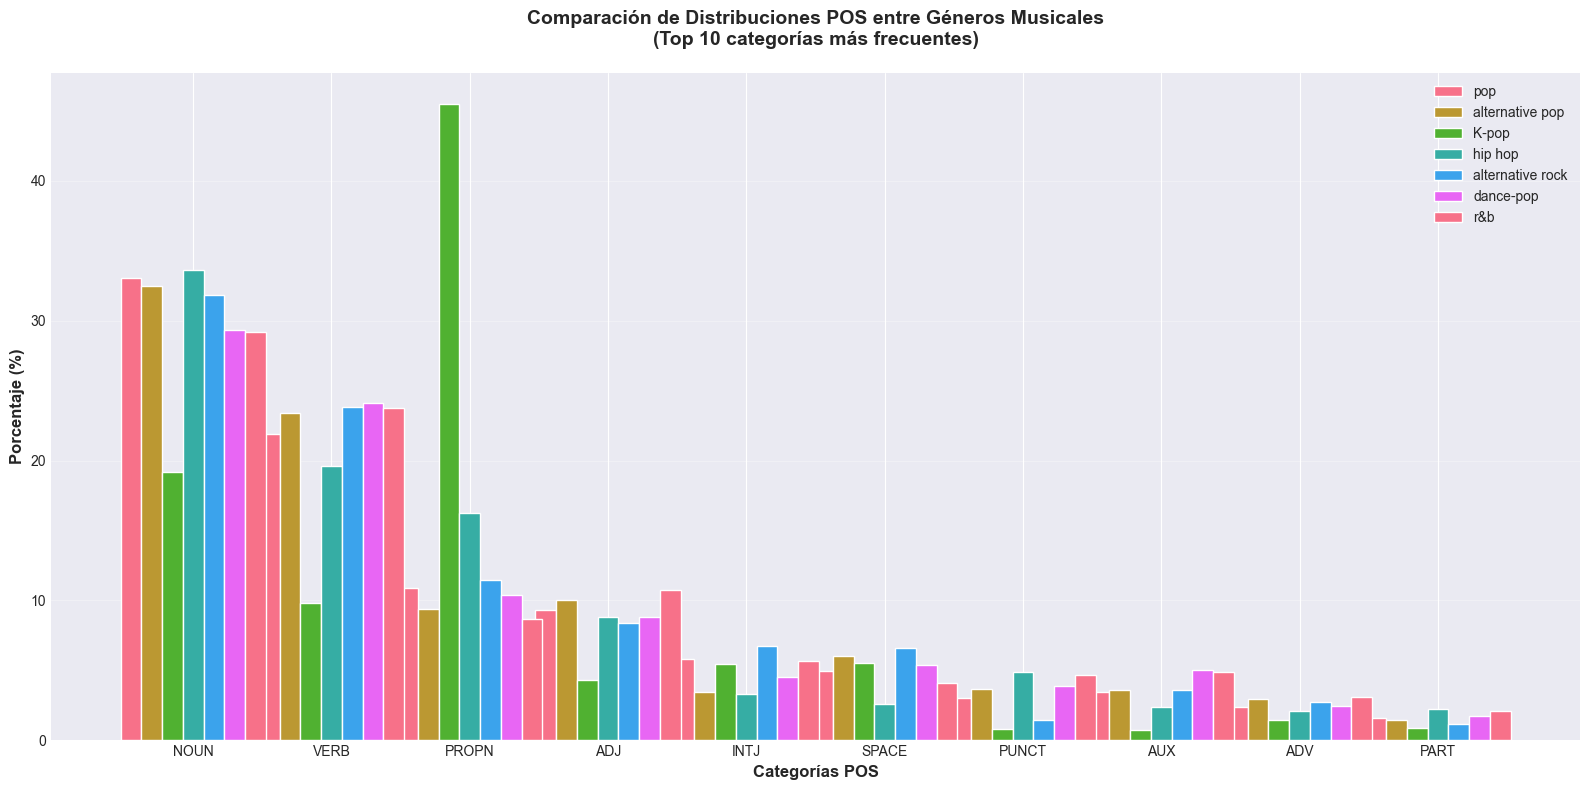

In [8]:
# 6. Comparación visual de distribuciones POS

# Obtener las categorías POS más comunes en general
all_pos_tags = set()
for genero in distribuciones_pos:
    all_pos_tags.update(distribuciones_pos[genero]['counts'].keys())

# Seleccionar top 10 categorías más frecuentes globalmente
pos_global = Counter()
for genero in distribuciones_pos:
    pos_global.update(distribuciones_pos[genero]['counts'])

top_10_pos = [tag for tag, _ in pos_global.most_common(10)]

# Crear DataFrame para visualización
data_comparacion = []
for genero in generos:
    for pos_tag in top_10_pos:
        porcentaje = distribuciones_pos[genero]['percentages'].get(pos_tag, 0)
        data_comparacion.append({
            'Genero': genero,
            'POS_Tag': pos_tag,
            'Porcentaje': porcentaje
        })

df_comparacion = pd.DataFrame(data_comparacion)

# Visualización: Gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(16, 8))

x = np.arange(len(top_10_pos))
width = 0.15
multiplier = 0

for i, genero in enumerate(generos):
    datos = df_comparacion[df_comparacion['Genero'] == genero]
    offset = width * multiplier
    rects = ax.bar(x + offset, datos['Porcentaje'], width, label=genero)
    multiplier += 1

ax.set_xlabel('Categorías POS', fontsize=12, fontweight='bold')
ax.set_ylabel('Porcentaje (%)', fontsize=12, fontweight='bold')
ax.set_title('Comparación de Distribuciones POS entre Géneros Musicales\n(Top 10 categorías más frecuentes)',
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x + width * (len(generos)-1) / 2)
ax.set_xticklabels(top_10_pos, rotation=0)
ax.legend(loc='upper right', fontsize=10)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Sección 7: Análisis del ratio sustantivos/verbos por género

ANÁLISIS DE RATIO SUSTANTIVOS/VERBOS POR GÉNERO

Estadísticas del ratio sustantivos/verbos:
                    mean  median     std    min      max
Genero                                                  
K-pop             13.342   9.217  13.528  0.000  122.500
alternative pop    1.773   1.500   1.474  0.333   14.625
alternative rock   2.157   1.500   4.325  0.000   64.000
dance-pop          1.670   1.241   2.099  0.000   20.600
hip hop            2.484   2.212   1.591  0.000   18.462
pop                2.204   1.629   4.357  0.000  156.000
r&b                1.751   1.237   2.488  0.462   17.867


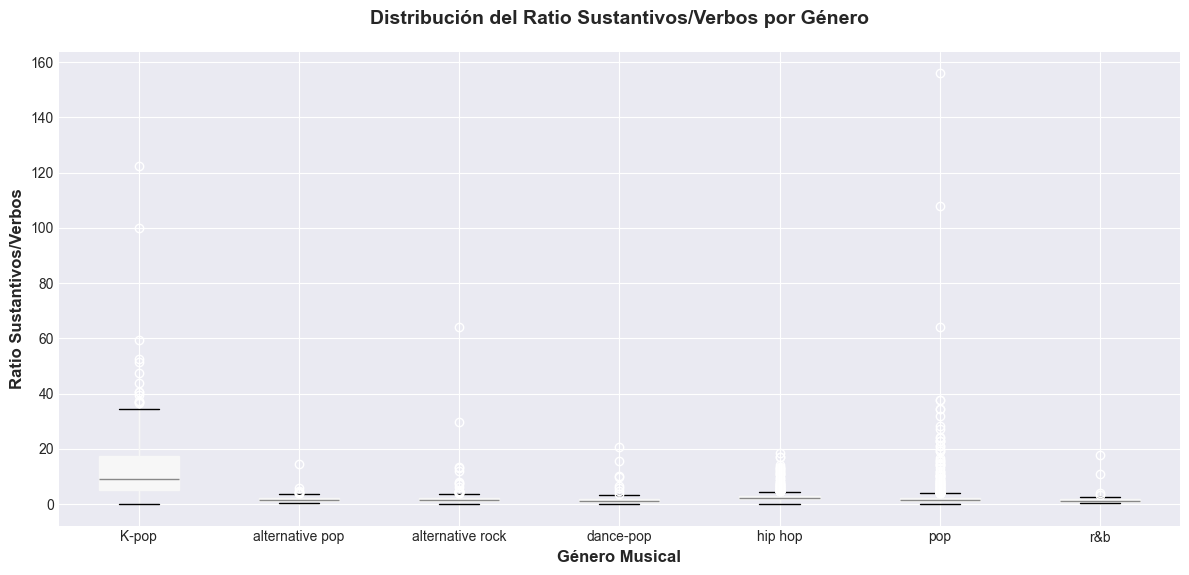

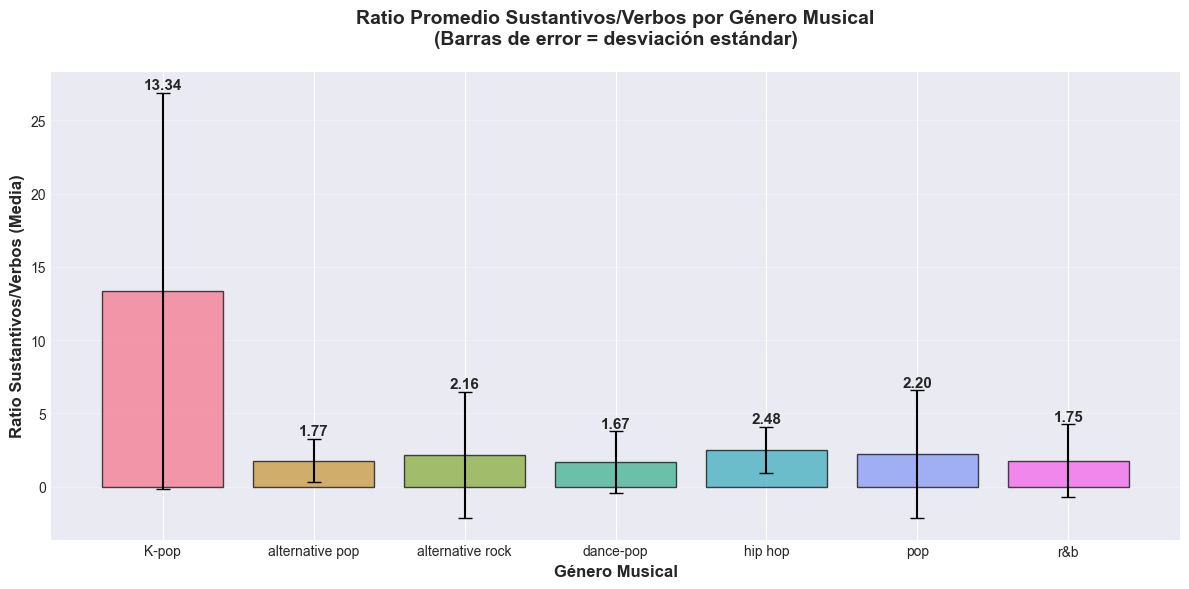

In [9]:
# 7. Análisis del ratio sustantivos/verbos por género

print("="*80)
print("ANÁLISIS DE RATIO SUSTANTIVOS/VERBOS POR GÉNERO")
print("="*80)

# Calcular estadísticas del ratio por género
ratio_stats = df.groupby('Genero')['ratio_sust_verb'].agg(['mean', 'median', 'std', 'min', 'max']).round(3)
print("\nEstadísticas del ratio sustantivos/verbos:")
print(ratio_stats)

# Visualización: Boxplot
fig, ax = plt.subplots(figsize=(12, 6))

df.boxplot(column='ratio_sust_verb', by='Genero', ax=ax, patch_artist=True)

ax.set_xlabel('Género Musical', fontsize=12, fontweight='bold')
ax.set_ylabel('Ratio Sustantivos/Verbos', fontsize=12, fontweight='bold')
ax.set_title('Distribución del Ratio Sustantivos/Verbos por Género',
             fontsize=14, fontweight='bold', pad=20)
plt.suptitle('')  # Remover título automático de pandas

plt.tight_layout()
plt.show()

# Visualización: Barras con media y error estándar
fig, ax = plt.subplots(figsize=(12, 6))

medias = df.groupby('Genero')['ratio_sust_verb'].mean()
errores = df.groupby('Genero')['ratio_sust_verb'].std()

bars = ax.bar(medias.index, medias.values,
              yerr=errores.values,
              capsize=5,
              color=sns.color_palette('husl', len(generos)),
              edgecolor='black',
              alpha=0.7)

# Añadir valores en las barras
for i, (bar, valor) in enumerate(zip(bars, medias.values)):
    ax.text(bar.get_x() + bar.get_width()/2, valor + errores.values[i] + 0.05,
            f'{valor:.2f}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_xlabel('Género Musical', fontsize=12, fontweight='bold')
ax.set_ylabel('Ratio Sustantivos/Verbos (Media)', fontsize=12, fontweight='bold')
ax.set_title('Ratio Promedio Sustantivos/Verbos por Género Musical\n(Barras de error = desviación estándar)',
             fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Sección 8: Análisis de densidad léxica por género

ANÁLISIS DE DENSIDAD LÉXICA POR GÉNERO

Estadísticas de densidad léxica:
                   mean  median    std    min  max
Genero                                            
K-pop             0.798   0.809  0.081  0.444  1.0
alternative pop   0.829   0.831  0.078  0.519  1.0
alternative rock  0.826   0.836  0.097  0.281  1.0
dance-pop         0.812   0.807  0.087  0.490  1.0
hip hop           0.831   0.838  0.067  0.406  1.0
pop               0.822   0.835  0.092  0.286  1.0
r&b               0.810   0.817  0.091  0.571  1.0


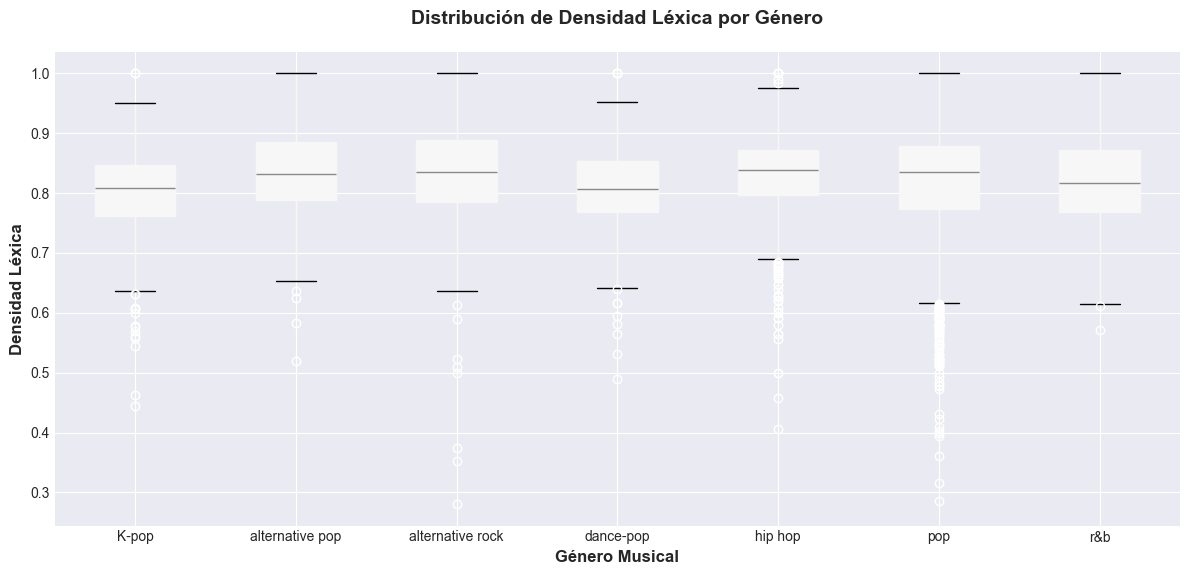

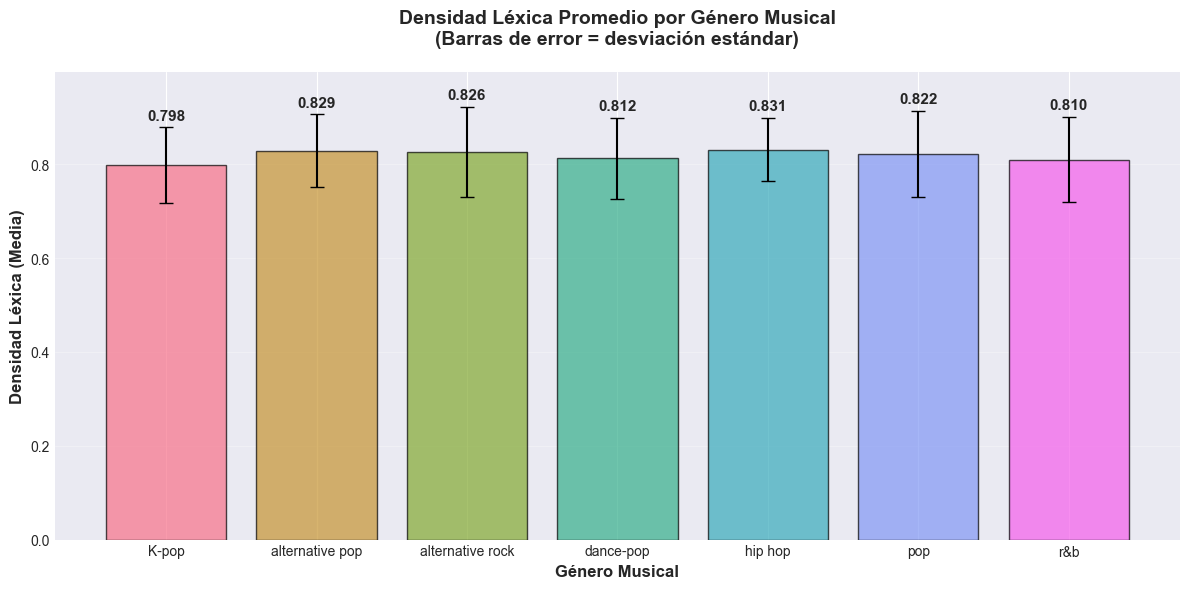

In [10]:
# 8. Análisis de densidad léxica por género

print("="*80)
print("ANÁLISIS DE DENSIDAD LÉXICA POR GÉNERO")
print("="*80)

# Calcular estadísticas de densidad léxica por género
densidad_stats = df.groupby('Genero')['densidad_lexica'].agg(['mean', 'median', 'std', 'min', 'max']).round(3)
print("\nEstadísticas de densidad léxica:")
print(densidad_stats)

# Visualización: Boxplot
fig, ax = plt.subplots(figsize=(12, 6))

df.boxplot(column='densidad_lexica', by='Genero', ax=ax, patch_artist=True)

ax.set_xlabel('Género Musical', fontsize=12, fontweight='bold')
ax.set_ylabel('Densidad Léxica', fontsize=12, fontweight='bold')
ax.set_title('Distribución de Densidad Léxica por Género',
             fontsize=14, fontweight='bold', pad=20)
plt.suptitle('')  # Remover título automático de pandas

plt.tight_layout()
plt.show()

# Visualización: Barras con media y error estándar
fig, ax = plt.subplots(figsize=(12, 6))

medias = df.groupby('Genero')['densidad_lexica'].mean()
errores = df.groupby('Genero')['densidad_lexica'].std()

bars = ax.bar(medias.index, medias.values,
              yerr=errores.values,
              capsize=5,
              color=sns.color_palette('husl', len(generos)),
              edgecolor='black',
              alpha=0.7)

# Añadir valores en las barras
for i, (bar, valor) in enumerate(zip(bars, medias.values)):
    ax.text(bar.get_x() + bar.get_width()/2, valor + errores.values[i] + 0.01,
            f'{valor:.3f}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_xlabel('Género Musical', fontsize=12, fontweight='bold')
ax.set_ylabel('Densidad Léxica (Media)', fontsize=12, fontweight='bold')
ax.set_title('Densidad Léxica Promedio por Género Musical\n(Barras de error = desviación estándar)',
             fontsize=14, fontweight='bold', pad=20)
ax.set_ylim(0, max(medias.values) * 1.2)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Sección 9: Análisis del uso de pronombres por género

ANÁLISIS DEL USO DE PRONOMBRES POR GÉNERO

Estadísticas del porcentaje de pronombres:
                   mean  median    std  min     max
Genero                                             
K-pop             0.651   0.309  1.270  0.0  16.667
alternative pop   0.784   0.000  1.482  0.0  10.000
alternative rock  0.280   0.000  0.919  0.0   6.667
dance-pop         0.899   0.000  1.918  0.0  12.621
hip hop           0.815   0.475  1.355  0.0  23.057
pop               0.556   0.000  1.711  0.0  25.000
r&b               0.362   0.000  1.218  0.0   8.163


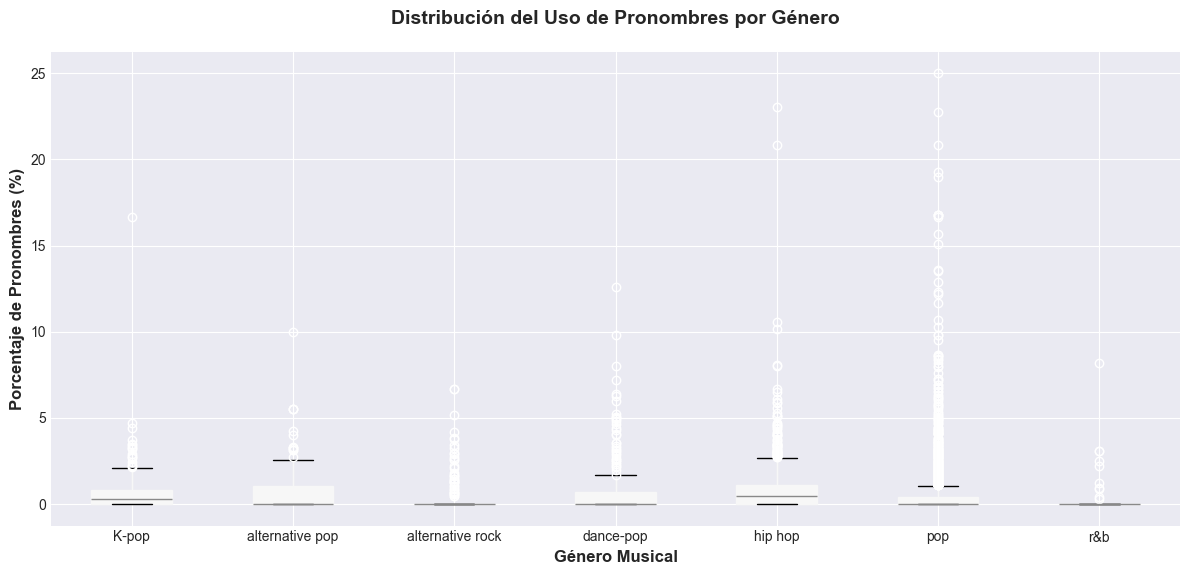

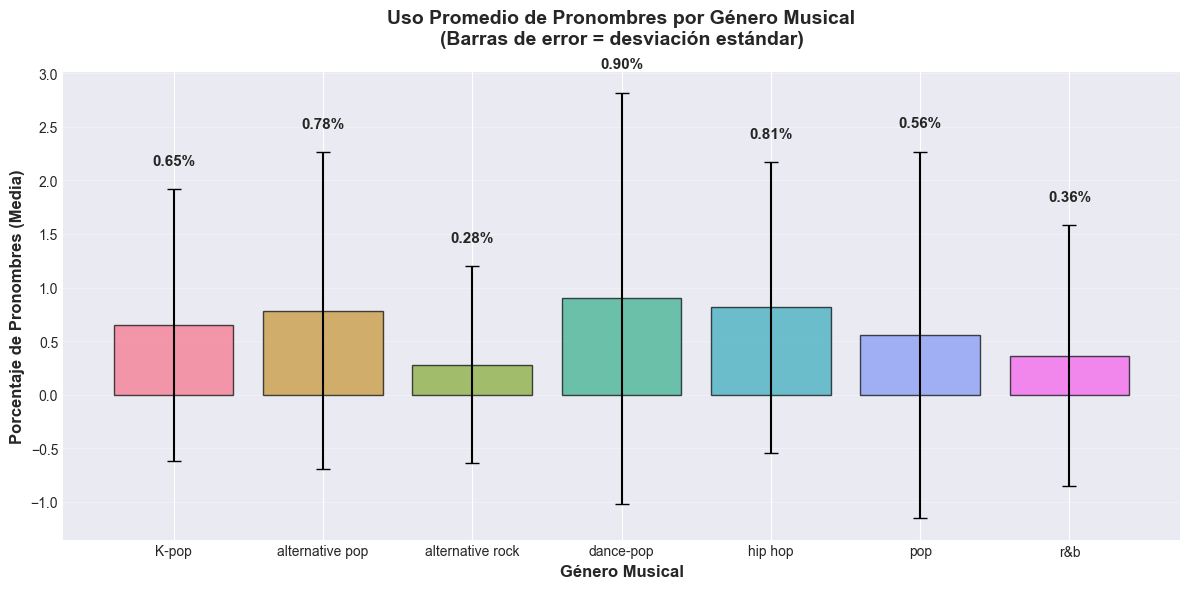

In [11]:
# 9. Análisis del uso de pronombres por género

print("="*80)
print("ANÁLISIS DEL USO DE PRONOMBRES POR GÉNERO")
print("="*80)

# Calcular estadísticas de pronombres por género
pronombres_stats = df.groupby('Genero')['porcentaje_pronombres'].agg(['mean', 'median', 'std', 'min', 'max']).round(3)
print("\nEstadísticas del porcentaje de pronombres:")
print(pronombres_stats)

# Visualización: Boxplot
fig, ax = plt.subplots(figsize=(12, 6))

df.boxplot(column='porcentaje_pronombres', by='Genero', ax=ax, patch_artist=True)

ax.set_xlabel('Género Musical', fontsize=12, fontweight='bold')
ax.set_ylabel('Porcentaje de Pronombres (%)', fontsize=12, fontweight='bold')
ax.set_title('Distribución del Uso de Pronombres por Género',
             fontsize=14, fontweight='bold', pad=20)
plt.suptitle('')  # Remover título automático de pandas

plt.tight_layout()
plt.show()

# Visualización: Barras con media y error estándar
fig, ax = plt.subplots(figsize=(12, 6))

medias = df.groupby('Genero')['porcentaje_pronombres'].mean()
errores = df.groupby('Genero')['porcentaje_pronombres'].std()

bars = ax.bar(medias.index, medias.values,
              yerr=errores.values,
              capsize=5,
              color=sns.color_palette('husl', len(generos)),
              edgecolor='black',
              alpha=0.7)

# Añadir valores en las barras
for i, (bar, valor) in enumerate(zip(bars, medias.values)):
    ax.text(bar.get_x() + bar.get_width()/2, valor + errores.values[i] + 0.2,
            f'{valor:.2f}%',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_xlabel('Género Musical', fontsize=12, fontweight='bold')
ax.set_ylabel('Porcentaje de Pronombres (Media)', fontsize=12, fontweight='bold')
ax.set_title('Uso Promedio de Pronombres por Género Musical\n(Barras de error = desviación estándar)',
             fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Sección 10: Pruebas estadísticas de significancia

In [12]:
# 10. Pruebas estadísticas de significancia

print("="*80)
print("PRUEBAS ESTADÍSTICAS DE SIGNIFICANCIA ENTRE GÉNEROS")
print("="*80)

# Test ANOVA para cada métrica
from scipy.stats import f_oneway

# Preparar datos por género
datos_por_genero = {}
for genero in generos:
    datos_por_genero[genero] = df[df['Genero'] == genero]

# ANOVA para ratio sustantivos/verbos
print("\n1. ANOVA - Ratio Sustantivos/Verbos:")
grupos_ratio = [datos_por_genero[g]['ratio_sust_verb'].dropna() for g in generos]
f_stat, p_value = f_oneway(*grupos_ratio)
print(f"   F-statistic: {f_stat:.4f}")
print(f"   p-value: {p_value:.6f}")
print(f"   {'✓ Diferencias significativas' if p_value < 0.05 else '✗ No hay diferencias significativas'} (α=0.05)")

# ANOVA para densidad léxica
print("\n2. ANOVA - Densidad Léxica:")
grupos_densidad = [datos_por_genero[g]['densidad_lexica'].dropna() for g in generos]
f_stat, p_value = f_oneway(*grupos_densidad)
print(f"   F-statistic: {f_stat:.4f}")
print(f"   p-value: {p_value:.6f}")
print(f"   {'✓ Diferencias significativas' if p_value < 0.05 else '✗ No hay diferencias significativas'} (α=0.05)")

# ANOVA para uso de pronombres
print("\n3. ANOVA - Uso de Pronombres:")
grupos_pronombres = [datos_por_genero[g]['porcentaje_pronombres'].dropna() for g in generos]
f_stat, p_value = f_oneway(*grupos_pronombres)
print(f"   F-statistic: {f_stat:.4f}")
print(f"   p-value: {p_value:.6f}")
print(f"   {'✓ Diferencias significativas' if p_value < 0.05 else '✗ No hay diferencias significativas'} (α=0.05)")

print("\n" + "="*80)

PRUEBAS ESTADÍSTICAS DE SIGNIFICANCIA ENTRE GÉNEROS

1. ANOVA - Ratio Sustantivos/Verbos:
   F-statistic: 237.4244
   p-value: 0.000000
   ✓ Diferencias significativas (α=0.05)

2. ANOVA - Densidad Léxica:
   F-statistic: 6.9497
   p-value: 0.000000
   ✓ Diferencias significativas (α=0.05)

3. ANOVA - Uso de Pronombres:
   F-statistic: 7.9892
   p-value: 0.000000
   ✓ Diferencias significativas (α=0.05)



## Sección 11: Heatmap de correlaciones entre métricas y géneros

Creando matriz de correlaciones...


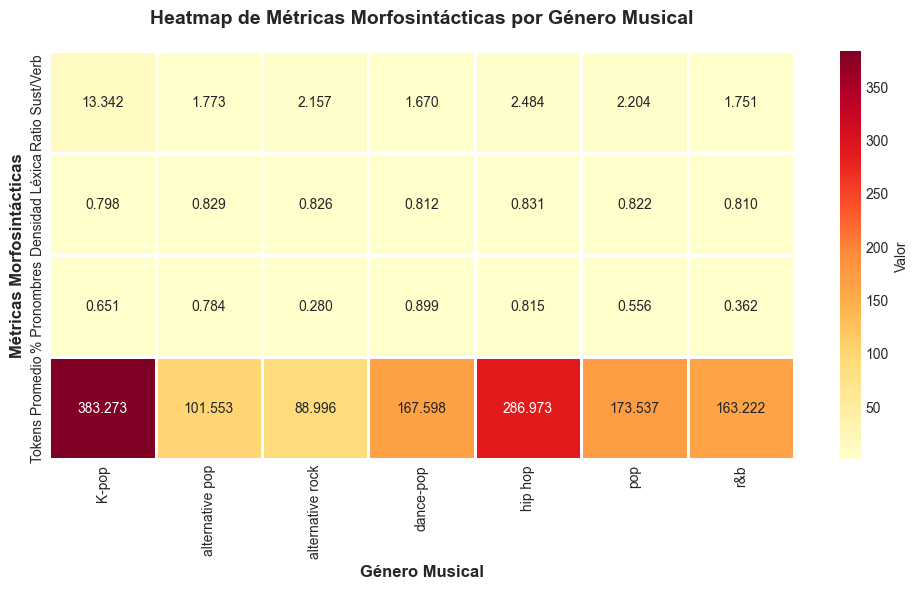

✓ Análisis completado


In [13]:
# 11. Heatmap de correlaciones entre métricas

print("Creando matriz de correlaciones...")

# Crear tabla pivote con promedios por género
metricas_pivot = df.groupby('Genero').agg({
    'ratio_sust_verb': 'mean',
    'densidad_lexica': 'mean',
    'porcentaje_pronombres': 'mean',
    'num_tokens': 'mean'
}).round(3)

# Renombrar columnas para mejor visualización
metricas_pivot.columns = ['Ratio Sust/Verb', 'Densidad Léxica', '% Pronombres', 'Tokens Promedio']

# Visualización: Heatmap
fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(metricas_pivot.T, annot=True, fmt='.3f', cmap='YlOrRd',
            cbar_kws={'label': 'Valor'}, linewidths=1, ax=ax)

ax.set_xlabel('Género Musical', fontsize=12, fontweight='bold')
ax.set_ylabel('Métricas Morfosintácticas', fontsize=12, fontweight='bold')
ax.set_title('Heatmap de Métricas Morfosintácticas por Género Musical',
             fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("✓ Análisis completado")

## Sección 12: Análisis de patrones distintivos por género

IDENTIFICACIÓN DE PATRONES DISTINTIVOS POR GÉNERO

Medias globales:
  Ratio Sust/Verb: 2.806
  Densidad Léxica: 0.823
  % Pronombres: 0.628

Desviaciones respecto a la media global:
             Genero  Ratio_Desv  Densidad_Desv  Pronombres_Desv
0               pop      -0.603         -0.001           -0.072
1   alternative pop      -1.034          0.006            0.156
2             K-pop      10.536         -0.025            0.023
3           hip hop      -0.322          0.009            0.187
4  alternative rock      -0.649          0.003           -0.348
5         dance-pop      -1.136         -0.010            0.272
6               r&b      -1.055         -0.013           -0.266


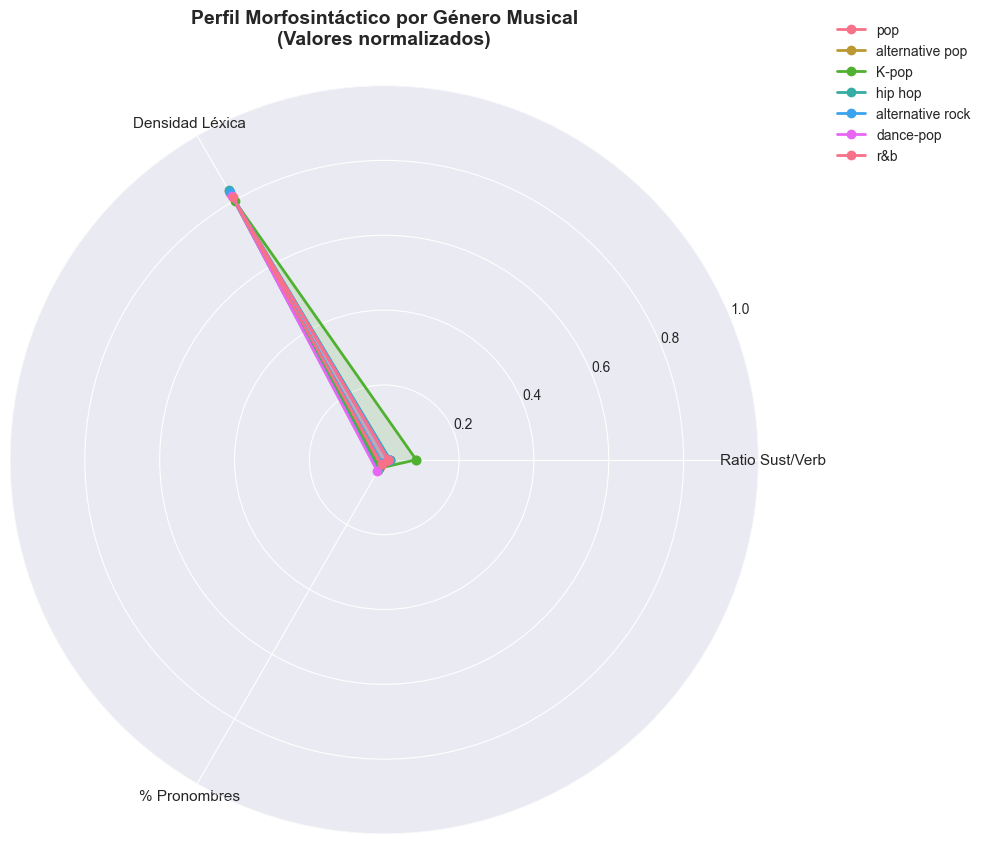

In [14]:
# 12. Análisis de patrones distintivos por género

print("="*80)
print("IDENTIFICACIÓN DE PATRONES DISTINTIVOS POR GÉNERO")
print("="*80)

# Calcular desviaciones respecto a la media global para cada métrica
media_global_ratio = df['ratio_sust_verb'].mean()
media_global_densidad = df['densidad_lexica'].mean()
media_global_pronombres = df['porcentaje_pronombres'].mean()

print(f"\nMedias globales:")
print(f"  Ratio Sust/Verb: {media_global_ratio:.3f}")
print(f"  Densidad Léxica: {media_global_densidad:.3f}")
print(f"  % Pronombres: {media_global_pronombres:.3f}")

# Calcular desviaciones por género
patrones_distintivos = []

for genero in generos:
    df_genero = df[df['Genero'] == genero]

    ratio_mean = df_genero['ratio_sust_verb'].mean()
    densidad_mean = df_genero['densidad_lexica'].mean()
    pronombres_mean = df_genero['porcentaje_pronombres'].mean()

    patrones_distintivos.append({
        'Genero': genero,
        'Ratio_Desv': ratio_mean - media_global_ratio,
        'Densidad_Desv': densidad_mean - media_global_densidad,
        'Pronombres_Desv': pronombres_mean - media_global_pronombres
    })

df_patrones = pd.DataFrame(patrones_distintivos)

print("\nDesviaciones respecto a la media global:")
print(df_patrones.round(3))

# Visualización: Radar chart comparativo
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

# Normalizar valores para el radar chart
metricas = ['Ratio Sust/Verb', 'Densidad Léxica', '% Pronombres']
angulos = np.linspace(0, 2 * np.pi, len(metricas), endpoint=False).tolist()
angulos += angulos[:1]

# Normalizar entre 0 y 1 para cada métrica
for genero in generos:
    df_genero = df[df['Genero'] == genero]

    valores = [
        df_genero['ratio_sust_verb'].mean() / df['ratio_sust_verb'].max(),
        df_genero['densidad_lexica'].mean() / df['densidad_lexica'].max(),
        df_genero['porcentaje_pronombres'].mean() / df['porcentaje_pronombres'].max()
    ]
    valores += valores[:1]

    ax.plot(angulos, valores, 'o-', linewidth=2, label=genero)
    ax.fill(angulos, valores, alpha=0.15)

ax.set_xticks(angulos[:-1])
ax.set_xticklabels(metricas, size=11)
ax.set_ylim(0, 1)
ax.set_title('Perfil Morfosintáctico por Género Musical\n(Valores normalizados)',
             fontsize=14, fontweight='bold', pad=30)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax.grid(True)

plt.tight_layout()
plt.show()

## Sección 13: Comparación de categorías POS específicas

ANÁLISIS DETALLADO DE CATEGORÍAS POS ESPECÍFICAS

Porcentaje de uso de categorías POS por género:
Genero     K-pop  alternative pop  alternative rock  dance-pop  hip hop  \
Categoria                                                                 
ADJ         4.35            10.02              8.42       8.80     8.82   
ADP         2.18             1.60              1.05       1.78     1.81   
ADV         1.47             2.93              2.72       2.43     2.09   
DET         0.20             0.02              0.02       0.02     0.05   
NOUN       19.17            32.49             31.80      29.29    33.61   
PRON        0.60             0.85              0.29       1.02     0.91   
VERB        9.85            23.36             23.81      24.09    19.60   

Genero       pop    r&b  
Categoria                
ADJ         9.30  10.78  
ADP         1.61   1.52  
ADV         2.36   3.12  
DET         0.03   0.03  
NOUN       33.07  29.15  
PRON        0.64   0.38  
VERB       21.91  

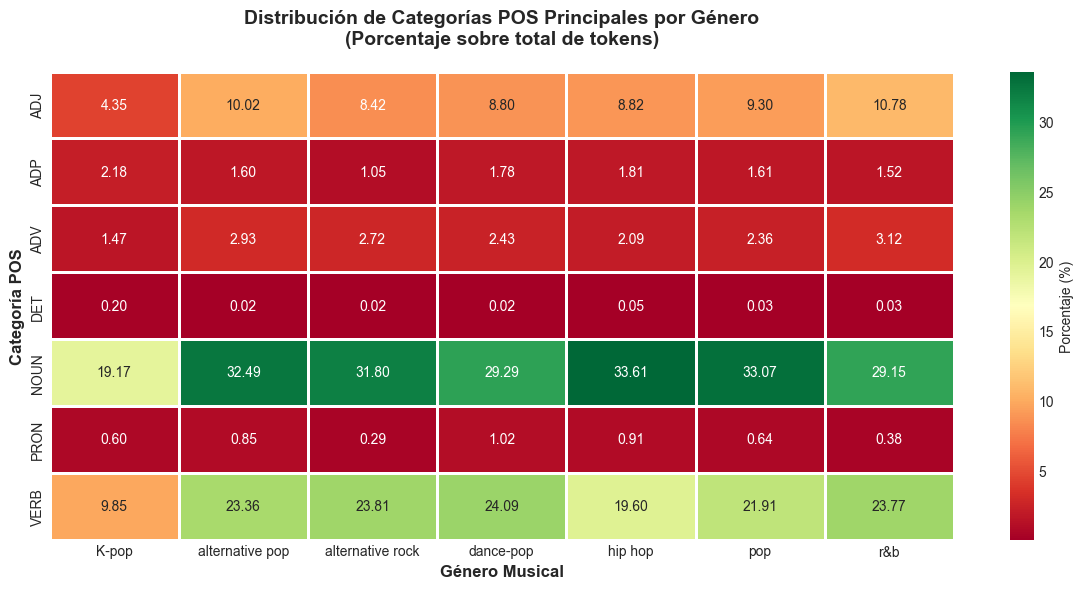

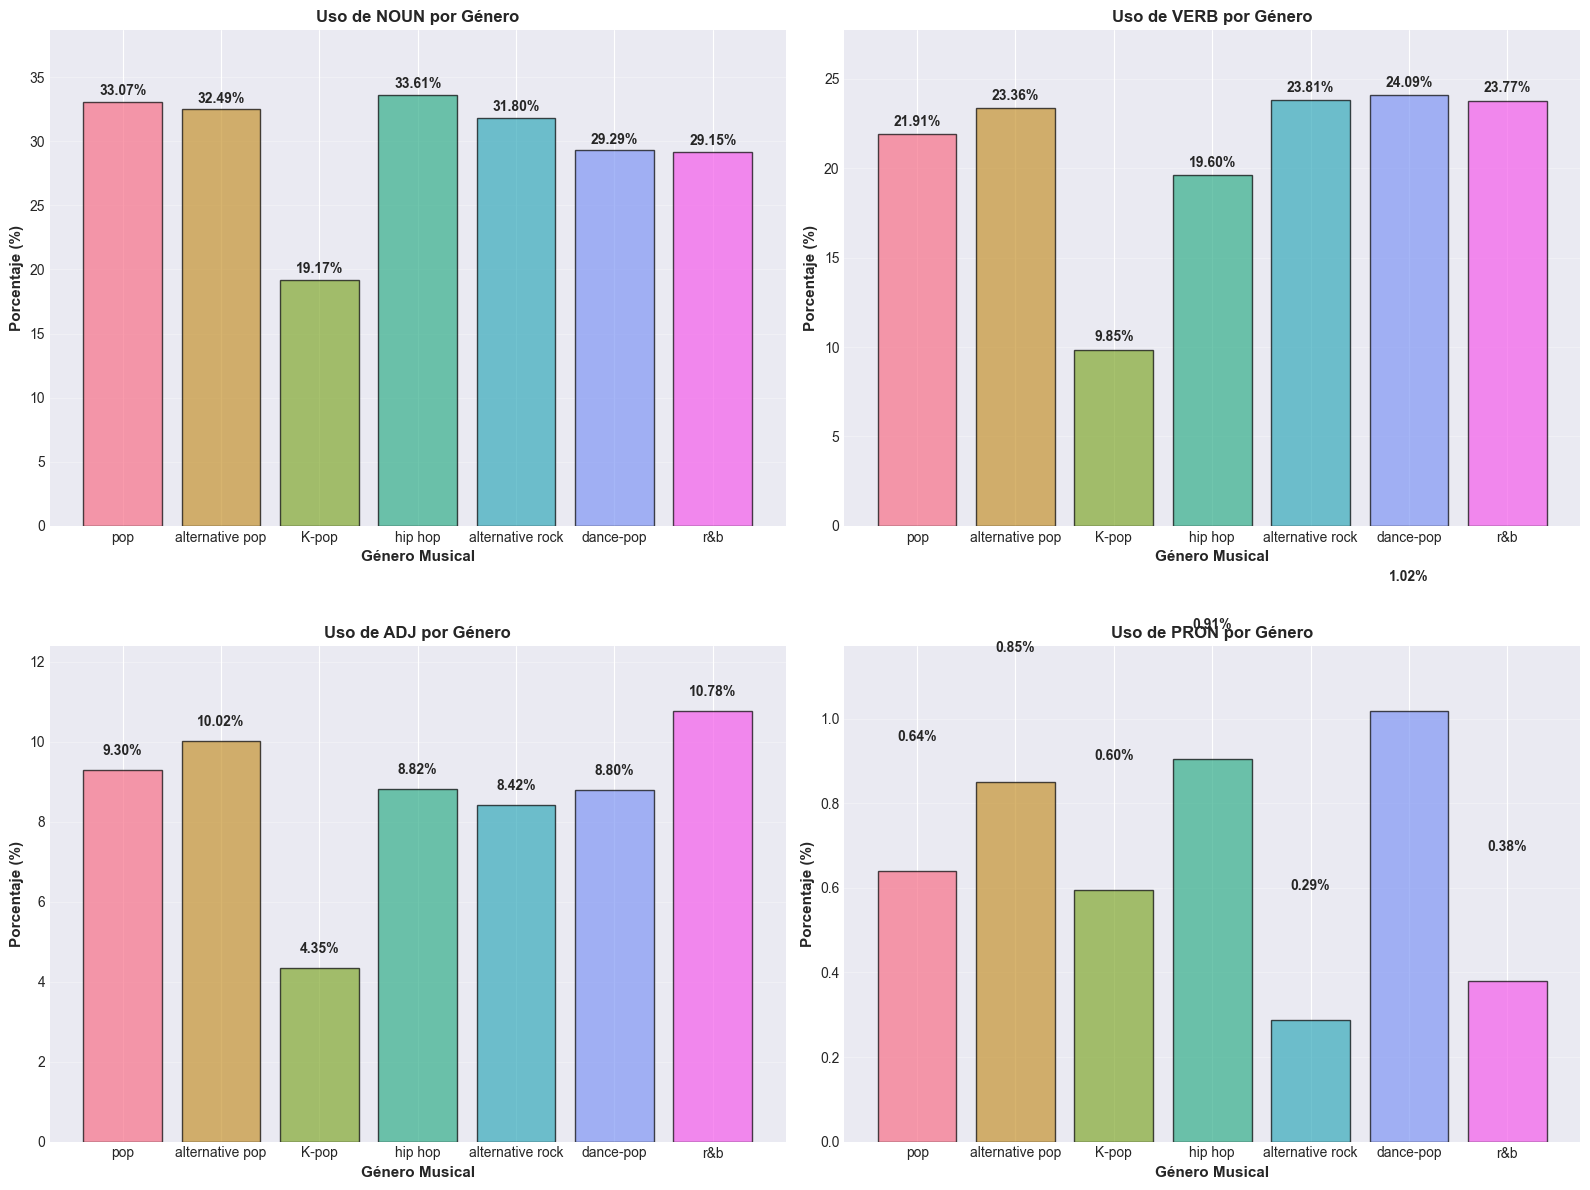

In [15]:
# 13. Comparación de categorías POS específicas

print("="*80)
print("ANÁLISIS DETALLADO DE CATEGORÍAS POS ESPECÍFICAS")
print("="*80)

# Categorías de interés para análisis comparativo
categorias_interes = ['NOUN', 'VERB', 'ADJ', 'ADV', 'PRON', 'ADP', 'DET']

# Calcular porcentaje de cada categoría por género
comparacion_categorias = []

for genero in generos:
    df_genero = df[df['Genero'] == genero]
    all_pos = [tag for pos_list in df_genero['pos_list'] for tag in pos_list]
    total = len(all_pos)

    pos_counts = Counter(all_pos)

    for categoria in categorias_interes:
        count = pos_counts.get(categoria, 0)
        porcentaje = (count / total * 100) if total > 0 else 0

        comparacion_categorias.append({
            'Genero': genero,
            'Categoria': categoria,
            'Porcentaje': porcentaje,
            'Frecuencia': count
        })

df_categorias = pd.DataFrame(comparacion_categorias)

# Mostrar tabla resumen
tabla_resumen = df_categorias.pivot(index='Categoria', columns='Genero', values='Porcentaje').round(2)
print("\nPorcentaje de uso de categorías POS por género:")
print(tabla_resumen)

# Visualización: Heatmap de categorías específicas
fig, ax = plt.subplots(figsize=(12, 6))

sns.heatmap(tabla_resumen, annot=True, fmt='.2f', cmap='RdYlGn',
            cbar_kws={'label': 'Porcentaje (%)'}, linewidths=1, ax=ax)

ax.set_xlabel('Género Musical', fontsize=12, fontweight='bold')
ax.set_ylabel('Categoría POS', fontsize=12, fontweight='bold')
ax.set_title('Distribución de Categorías POS Principales por Género\n(Porcentaje sobre total de tokens)',
             fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

# Gráfico de barras agrupadas para categorías específicas
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

categorias_destacadas = ['NOUN', 'VERB', 'ADJ', 'PRON']

for idx, categoria in enumerate(categorias_destacadas):
    ax = axes[idx]

    datos = df_categorias[df_categorias['Categoria'] == categoria]

    bars = ax.bar(datos['Genero'], datos['Porcentaje'],
                  color=sns.color_palette('husl', len(generos)),
                  edgecolor='black',
                  alpha=0.7)

    # Añadir valores
    for bar, valor in zip(bars, datos['Porcentaje']):
        ax.text(bar.get_x() + bar.get_width()/2, valor + 0.3,
                f'{valor:.2f}%',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

    ax.set_xlabel('Género Musical', fontsize=11, fontweight='bold')
    ax.set_ylabel('Porcentaje (%)', fontsize=11, fontweight='bold')
    ax.set_title(f'Uso de {categoria} por Género', fontsize=12, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)
    ax.set_ylim(0, max(datos['Porcentaje']) * 1.15)

plt.tight_layout()
plt.show()

## Sección 14: Resumen ejecutivo y conclusiones

In [16]:
# 14. Resumen ejecutivo y conclusiones

print("="*80)
print("RESUMEN EJECUTIVO - COMPARACIÓN ENTRE GÉNEROS MUSICALES")
print("="*80)

# Función para identificar características distintivas
def identificar_caracteristicas(genero, df_genero, media_global_ratio, media_global_densidad, media_global_pronombres):
    """Identifica las características distintivas de un género."""

    caracteristicas = []

    # Ratio sustantivos/verbos
    ratio_mean = df_genero['ratio_sust_verb'].mean()
    if ratio_mean > media_global_ratio * 1.1:
        caracteristicas.append(f"Alto ratio sustantivos/verbos ({ratio_mean:.2f})")
    elif ratio_mean < media_global_ratio * 0.9:
        caracteristicas.append(f"Bajo ratio sustantivos/verbos ({ratio_mean:.2f})")

    # Densidad léxica
    densidad_mean = df_genero['densidad_lexica'].mean()
    if densidad_mean > media_global_densidad * 1.05:
        caracteristicas.append(f"Alta densidad léxica ({densidad_mean:.3f})")
    elif densidad_mean < media_global_densidad * 0.95:
        caracteristicas.append(f"Baja densidad léxica ({densidad_mean:.3f})")

    # Uso de pronombres
    pronombres_mean = df_genero['porcentaje_pronombres'].mean()
    if pronombres_mean > media_global_pronombres * 1.1:
        caracteristicas.append(f"Alto uso de pronombres ({pronombres_mean:.2f}%)")
    elif pronombres_mean < media_global_pronombres * 0.9:
        caracteristicas.append(f"Bajo uso de pronombres ({pronombres_mean:.2f}%)")

    return caracteristicas

# Generar resumen por género
print("\n" + "-"*80)
print("CARACTERÍSTICAS DISTINTIVAS POR GÉNERO:")
print("-"*80)

for genero in generos:
    df_genero = df[df['Genero'] == genero]

    print(f"\n{genero.upper()}:")
    print(f"  Número de canciones: {len(df_genero)}")
    print(f"  Total de tokens: {df_genero['num_tokens'].sum():,}")
    print(f"  Promedio tokens por canción: {df_genero['num_tokens'].mean():.1f}")

    caracteristicas = identificar_caracteristicas(
        genero, df_genero,
        media_global_ratio,
        media_global_densidad,
        media_global_pronombres
    )

    if caracteristicas:
        print(f"  Características distintivas:")
        for car in caracteristicas:
            print(f"    • {car}")
    else:
        print(f"  Características: Perfil cercano a la media global")

    # Top 3 POS tags
    all_pos = [tag for pos_list in df_genero['pos_list'] for tag in pos_list]
    pos_counts = Counter(all_pos)
    top_3 = pos_counts.most_common(3)
    print(f"  Top 3 categorías POS: {', '.join([f'{tag}({cnt})' for tag, cnt in top_3])}")

print("\n" + "="*80)

# Tabla resumen final
print("\nTABLA RESUMEN DE MÉTRICAS:")
print("-"*80)

resumen_final = df.groupby('Genero').agg({
    'nombre_cancion': 'count',
    'num_tokens': 'mean',
    'ratio_sust_verb': 'mean',
    'densidad_lexica': 'mean',
    'porcentaje_pronombres': 'mean'
}).round(3)

resumen_final.columns = ['N_Canciones', 'Tokens_Medio', 'Ratio_S/V', 'Dens_Lex', '%_Pron']
print(resumen_final)

print("\n" + "="*80)

RESUMEN EJECUTIVO - COMPARACIÓN ENTRE GÉNEROS MUSICALES

--------------------------------------------------------------------------------
CARACTERÍSTICAS DISTINTIVAS POR GÉNERO:
--------------------------------------------------------------------------------

POP:
  Número de canciones: 2946
  Total de tokens: 511,239
  Promedio tokens por canción: 173.5
  Características distintivas:
    • Bajo ratio sustantivos/verbos (2.20)
    • Bajo uso de pronombres (0.56%)
  Top 3 categorías POS: NOUN(169077), VERB(112001), PROPN(55846)

ALTERNATIVE POP:
  Número de canciones: 132
  Total de tokens: 13,405
  Promedio tokens por canción: 101.6
  Características distintivas:
    • Bajo ratio sustantivos/verbos (1.77)
    • Alto uso de pronombres (0.78%)
  Top 3 categorías POS: NOUN(4355), VERB(3132), ADJ(1343)

K-POP:
  Número de canciones: 267
  Total de tokens: 102,334
  Promedio tokens por canción: 383.3
  Características distintivas:
    • Alto ratio sustantivos/verbos (13.34)
  Top 3 categorí